In [1]:
#Abrimos la carpeta donde se encuentran las bases de datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pyreadstat
import pyreadstat as py
import openpyxl


In [2]:
import os
print(os.getcwd())  # Muestra la ruta actual de trabajo
print(os.listdir())  # Lista todos los archivos en el directorio actual


/Users/arielamirmelstein/Documents/GitHub/CC408--T2-9-/TP3
['TP·4,.ipynb', '.DS_Store', 'usu_individual_T124.xlsx', 'TP·5.ipynb', 'Untitled.ipynb', 'norespondieron.csv', 'TP·4.ipynb', 'TP3.1.ipynb', 'TP3.3.ipynb', 'TP3.7.ipynb', 'TP3.10.ipynb', 'Individual_t104.dta', 'respondieron.csv', 'Individual_t104 copy.dta', 'TP3.12.ipynb', 'TP·4,,.ipynb', 'usu_individual_T124 copy.xlsx', '.ipynb_checkpoints', '~$usu_individual_T124 copy.xlsx', 'TP3.pdf', 'EPH_disenoreg_T1_2004.pdf', 'TP3.2.ipynb', 'TP3.10-Copia.ipynb', 'EPH_registro_1T2024.pdf', 'TP3.11.ipynb', 'TP3.6.ipynb']


In [3]:
os.chdir("/Users/arielamirmelstein/Documents/GitHub/CC408--T2-9-/TP3")
print(os.listdir())  # Verifica que el archivo esté en esta carpeta


['TP·4,.ipynb', '.DS_Store', 'usu_individual_T124.xlsx', 'TP·5.ipynb', 'Untitled.ipynb', 'norespondieron.csv', 'TP·4.ipynb', 'TP3.1.ipynb', 'TP3.3.ipynb', 'TP3.7.ipynb', 'TP3.10.ipynb', 'Individual_t104.dta', 'respondieron.csv', 'Individual_t104 copy.dta', 'TP3.12.ipynb', 'TP·4,,.ipynb', 'usu_individual_T124 copy.xlsx', '.ipynb_checkpoints', '~$usu_individual_T124 copy.xlsx', 'TP3.pdf', 'EPH_disenoreg_T1_2004.pdf', 'TP3.2.ipynb', 'TP3.10-Copia.ipynb', 'EPH_registro_1T2024.pdf', 'TP3.11.ipynb', 'TP3.6.ipynb']


In [4]:
# Cargo archivo DTA
df_2004 = pd.read_stata("Individual_t104 copy.dta")
print(df_2004.head())
#aglomerados de Ciudad Autónoma de Buenos Aires (32) y Gran Buenos Aires (33)
df_2004.drop(df_2004[df_2004["aglomerado"].isin([32, 33])].index, inplace=True)


# Cambiamos los nombres de las columnas a minúsculas
df_2004.columns = df_2004.columns.str.lower()

df_2004

     CODUSU  nro_hogar componente h15    ano4       trimestre  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   

              region mas_500              aglomerado  pondera  ... deccfr  \
0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
1  Gran Buenos Aires       S  Ciudad de Buenos Aires   2018.0  ...     00   
2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1486.0  ...     07   
3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   

  ideccfr rdeccfr gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  
0              06      06              04   0.0   0.0   0.0  00000  
1       

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45284,285733,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45285,285733,1.0,2.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45286,285733,1.0,3.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45287,285733,1.0,4.0,0.0,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000


In [5]:
# Cargo el archivo xlsx
df_2024 = pd.read_excel("usu_individual_T124 copy.xlsx") 

print(df_2024.head())
# aglomerados de Ciudad Autónoma de Buenos Aires (32) y Gran Buenos Aires (33)
df_2024.drop(df_2024[df_2024["AGLOMERADO"].isin([32, 33])].index, inplace=True)


# Cambiamos los nombres de las columnas a minúsculas
df_2024.columns = df_2024.columns.str.lower()

df_2024

                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNOPUTHLMKQCDEGGFB00852588  2024          1          1           3    1   
1  TQRMNOPUTHLMKQCDEGGFB00852588  2024          1          1           4    1   
2  TQRMNOPUTHLMKQCDEGGFB00852588  2024          1          1           5    0   
3  TQRMNOPPWHLLKRCDEGGFB00852574  2024          1          1           1    1   
4  TQRMNOPPWHLLKRCDEGGFB00852574  2024          1          1           2    1   

   REGION MAS_500  AGLOMERADO  PONDERA  ...  PDECIFR  ADECIFR      IPCF  \
0      42       S          10      439  ...      NaN       12       0.0   
1      42       S          10      439  ...      NaN       12       0.0   
2      42       S          10      439  ...      NaN       12       0.0   
3      42       S          10      675  ...      NaN        8  212500.0   
4      42       S          10      675  ...      NaN        8  212500.0   

   DECCFR  IDECCFR  RDECCFR  GDECCFR  PDECCFR  ADECCFR  PONDIH

,codusu,ano4,trimestre,nro_hogar,componente,h15,region,mas_500,aglomerado,pondera,...,pdecifr,adecifr,ipcf,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pondih
0,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,3,1,42,S,10,439,...,NaN,12,0.00,12,12.0,12,12.0,NaN,12,0
1,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,4,1,42,S,10,439,...,NaN,12,0.00,12,12.0,12,12.0,NaN,12,0
2,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,5,0,42,S,10,439,...,NaN,12,0.00,12,12.0,12,12.0,NaN,12,0
3,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,1,1,42,S,10,675,...,NaN,8,212500.00,6,6.0,6,6.0,NaN,6,1610
4,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,2,1,42,S,10,675,...,NaN,8,212500.00,6,6.0,6,6.0,NaN,6,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46028,TQRMNOQWXHJMKOCDEOHCH00803080,2024,1,1,1,1,44,N,91,128,...,9.0,9,300000.00,7,8.0,6,NaN,8.0,7,126
46029,TQRMNOQWXHJMKOCDEOHCH00803080,2024,1,1,2,1,44,N,91,128,...,9.0,9,300000.00,7,8.0,6,NaN,8.0,7,126
46030,TQRMNOQWXHJMKOCDEOHCH00803080,2024,1,1,3,1,44,N,91,128,...,9.0,9,300000.00,7,8.0,6,NaN,8.0,7,126
46031,TQRMNOQXQHJMKOCDEOHCH00794205,2024,1,1,1,1,44,N,91,131,...,7.0,6,183333.33,5,5.0,4,NaN,6.0,4,135


In [6]:
diferentes_1 = set(df_2004.columns) - set(df_2024.columns)  # Columnas que están en df_2004 pero no en df_2024
diferentes_2 = set(df_2024.columns) - set(df_2004.columns)  # Columnas que están en df_2024 pero no en df_2004

print(f"Columnas en df_2004 pero no en df_2024: {diferentes_1}")
print(f"Columnas en df_2024 pero no en df_2004: {diferentes_2}")

Columnas en df_2004 pero no en df_2024: {'pj3_1', 'pj2_1', 'pj1_1', 'idimpp'}
Columnas en df_2024 pero no en df_2004: {'pondii', 'ch05', 'imputa', 'pondiio', 'pondih'}


In [7]:
df_2004 = df_2004.drop(columns=['pj3_1', 'pj1_1', 'idimpp', 'pj2_1'])
df_2024 = df_2024.drop(columns=['imputa', 'pondii', 'pondiio', 'pondih', 'ch05'])

In [8]:
# Agregar una columna para identificar el año en df_2004
df_2004['anio'] = 2004

# Agregar una columna para identificar el año en df_2024
df_2024['anio'] = 2024

In [9]:
df_conjunto = pd.concat([df_2004, df_2024], axis=0)
# Ver el DataFrame resultante
print(df_conjunto)

                              codusu  nro_hogar componente h15    ano4  \
0                           125098          1.0        1.0  Sí  2004.0   
1                           125397          1.0        1.0  Sí  2004.0   
2                           125515          1.0        1.0  Sí  2004.0   
3                           125558          1.0        1.0  Sí  2004.0   
4                           125558          1.0        2.0  Sí  2004.0   
...                              ...        ...        ...  ..     ...   
46028  TQRMNOQWXHJMKOCDEOHCH00803080        1.0          1   1  2024.0   
46029  TQRMNOQWXHJMKOCDEOHCH00803080        1.0          2   1  2024.0   
46030  TQRMNOQWXHJMKOCDEOHCH00803080        1.0          3   1  2024.0   
46031  TQRMNOQXQHJMKOCDEOHCH00794205        1.0          1   1  2024.0   
46032  TQRMNOQXQHJMKOCDEOHCH00794205        1.0          2   1  2024.0   

            trimestre             region mas_500              aglomerado  \
0      1er. Trimestre  Gran Buenos 

In [10]:
print(df_conjunto.columns)

Index(['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr',
       'pdeccfr', 'adeccfr', 'anio'],
      dtype='object', length=173)


In [11]:
df_conjunto.describe()
#despues de esto saco los negativos 

,nro_hogar,ano4,pondera,pp03d,pp3e_tot,pp3f_tot,pp04b2,pp04b3_mes,pp04b3_ano,pp04b3_dia,...,v10_m,v11_m,v12_m,v18_m,v19_am,v21_m,t_vi,itf,ipcf,anio
count,84288.000000,84288.000000,84288.000000,62390.000000,62390.000000,62390.000000,62390.000000,62390.000000,62390.000000,62390.000000,...,8.428800e+04,84288.000000,8.428800e+04,84288.000000,84288.000000,8.428800e+04,8.428800e+04,8.428800e+04,8.428800e+04,84288.000000
mean,1.038962,2013.253749,435.289792,0.097756,19.807389,0.778987,0.049816,0.067286,0.170075,0.043212,...,5.000975e+02,200.338898,1.395909e+03,14.541441,0.011864,2.135983e+03,2.297155e+04,2.314693e+05,7.323032e+04,2013.253749
std,0.400713,9.972176,440.694961,0.463459,32.795580,11.865789,0.326460,1.364958,1.800766,1.465397,...,2.729028e+04,3373.115142,1.801317e+04,1455.339698,3.444428,1.797916e+04,9.529610e+04,4.391533e+05,1.560612e+05,9.972176
min,1.000000,2004.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.000000e+00,-9.000000,-9.000000e+00,-9.000000,0.000000,-9.000000e+00,-9.000000e+00,0.000000e+00,0.000000e+00,2004.000000
25%,1.000000,2004.000000,178.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,4.800000e+02,1.054545e+02,2004.000000
50%,1.000000,2004.000000,279.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.350000e+03,3.500000e+02,2004.000000
75%,1.000000,2024.000000,471.250000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,3.700000e+05,1.032500e+05,2024.000000
max,51.000000,2024.000000,4981.000000,9.000000,999.000000,999.000000,31.000000,99.000000,99.000000,99.000000,...,5.000000e+06,600000.000000,2.500000e+06,300000.000000,1000.000000,1.200000e+06,5.300000e+06,1.630000e+07,8.150000e+06,2024.000000


In [12]:
# VALORES NEGATIVOS EN EDAD

valores_negativos_edad = df_conjunto['ch06'] < 0
# Cantidad de datos negativos
cantidad_negativos_edad = valores_negativos_edad.sum()
print("Cantidad de valores negativos en variable edad:", cantidad_negativos_edad)

# Me quedo con los valores mayores o iguales a 0 de edad
df_conjunto = df_conjunto[df_conjunto['ch06'] >= 0]

# Calcular cada estadística por separado
count_ch06 = df_conjunto['ch06'].count()
mean_ch06 = df_conjunto['ch06'].mean()
std_ch06 = df_conjunto['ch06'].std()
min_ch06 = df_conjunto['ch06'].min()
max_ch06 = df_conjunto['ch06'].max()

# Mostrar las estadísticas
print(f"Cantidad: {count_ch06}")
print(f"Media: {mean_ch06:.2f}")
print(f"Desviacion estandar: {std_ch06:.2f}")
print(f"Minimo: {min_ch06:.2f}")
print(f"Maximo: {max_ch06:.2f}")

TypeError: '<' not supported between instances of 'str' and 'int'

In [13]:
# VALORES NEGATIVOS EN INGRESO POR CIRCULO FAMILIAR
valores_negativos_ipcf = df_conjunto[df_conjunto['ipcf'] < 0]

# Cantidad de datos negativos
cantidad_negativos_ipcf = len(valores_negativos_ipcf)

# Mostrar resultados
print("Cantidad de valores negativos en variable ipcf:", cantidad_negativos_ipcf)

# Me quedo con los valores mayores o iguales a 0. Como no hay valores negativos, no saca ninguno
df_conjunto = df_conjunto[df_conjunto['ipcf'] >= 0]

Cantidad de valores negativos en variable ipcf: 0


In [14]:
# 'ch04' es la columna que indica el sexo y 'ano4' es la columna para el año.
# Calcular la composición por sexo para cada año
composicion_sexo_2004 = df_2004['ch04'].value_counts(normalize=True) * 100  # Porcentajes
composicion_sexo_2024 = df_2024['ch04'].value_counts(normalize=True) * 100  # Porcentajes

# Renombrar los índices de la composición de 2024
composicion_sexo_2024.index = composicion_sexo_2024.index.map({1: 'Varón', 2: 'Mujer'})

# resultado de porcentaje sexos por año
print("\nComposición por sexo en 2004 y 2024:")
for year, composicion in zip(['2004', '2024'], [composicion_sexo_2004, composicion_sexo_2024]):
    print(f"\nComposición por sexo en {year}:")
    for sexo, porcentaje in composicion.items():
        print(f"{sexo}: {porcentaje:.2f}%")



Composición por sexo en 2004 y 2024:

Composición por sexo en 2004:
Mujer: 52.32%
Varón: 47.68%

Composición por sexo en 2024:
Mujer: 51.94%
Varón: 48.06%


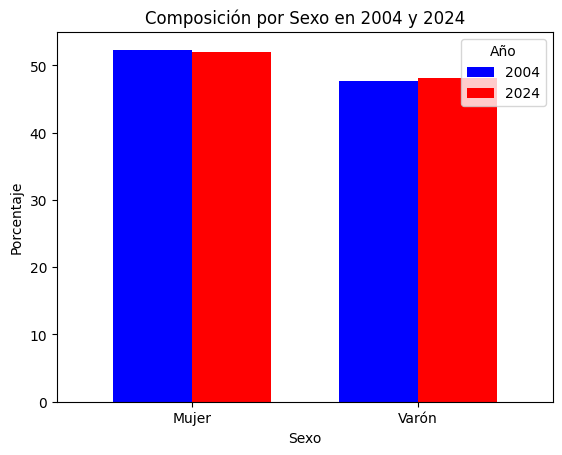

In [15]:
# Crear un DataFrame para el gráfico
df_composicion = pd.DataFrame({
    '2004': composicion_sexo_2004,
    '2024': composicion_sexo_2024
})

# Configurar gráfico de barras
df_composicion.plot(kind='bar', color=['blue', 'red'], width=0.7)
plt.title("Composición por Sexo en 2004 y 2024")
plt.xlabel("Sexo")
plt.ylabel("Porcentaje")
plt.legend(title="Año")
plt.xticks(rotation=0)
plt.show()

In [17]:
#Matriz correlación 

variables = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']
print("Columnas en df_conjunto:", df_conjunto.columns)

# chequeo que todas las columnas para la matriz están presentes
missing_columns = [col for col in variables if col not in df_conjunto.columns]
if missing_columns:
    print("Columnas faltantes:", missing_columns)
else:
    print("Todas las columnas necesarias están presentes.")

Columnas en df_conjunto: Index(['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr',
       'pdeccfr', 'adeccfr', 'anio'],
      dtype='object', length=173)
Todas las columnas necesarias están presentes.


In [18]:
# Identificar columnas que contienen valores de tipo string, es decir no numericas, para despues ocupanos de pasarlas a numericas 
string_columns = [col for col in variables if df_2004[col].apply(lambda x: isinstance(x, str)).any()]

if string_columns:
    print("Las siguientes columnas contienen valores de tipo string:", string_columns)
else:
    print("No hay columnas de tipo string en las variables de interés.")

Las siguientes columnas contienen valores de tipo string: ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac']


In [19]:
# Define los mapeos de conversión para cada columna
conversiones = {
    'ch04': {
        'Varón': 1,
        'Mujer': 2,
    },
    'ch06': {
        'Menos de 1 año': 0,
        '1-2 años': 1,
        '3-5 años': 2,
        'Más de 5 años': 3,
        '98 y más años': 4,
    },
    'nivel_ed': {
        'Primaria incompleto (incluye educación especial)': 1,
        'Primaria Completa': 2,
        'Secundaria Incompleta': 3,
        'Secundaria completo': 4,
        'Superior universitario incompleto': 5,
        'Superior Universitaria Completa': 6,
        'Sin instrucción': 7,
        'Ns./Nr.': 9
    },
    'ch08': {
        'Obra social (incluye PAMI)': 1,
        'Mutual/Prepaga/Servicio de emergencia': 2,
        'Planes y seguros públicos': 3,
        'No paga ni le descuentan': 4,
        'Ns./Nr.': 9,
        'Obra social y mutual / prepaga / servicio de emergencia': 12,
        'Obra social y planes y seguros públicos': 13,
        'Mutual/prepaga/ servicio de emergencia/Planes y seguros públicos': 23,
        'Obra social, mutual /prepaga / servicio de emergencia y planes y seguros públicos': 123
    },
    'estado': {
        'Entrevista individual no realizada (no respuesta al cuestion': 0, 
        'Ocupado': 1,
        'Desocupado': 2,
        'Inactivo': 3,
        'Menor de 10 años': 4
    },
    'cat_inac': {
        'Jubilado/pensionado': 1,
        'Rentista': 2,
        'Estudiante': 3,
        'Ama de casa': 4,
        'Menor de 6 años': 5,
        'Discapacitado': 6,
        'Otros': 7,
        0: 8  # Manejo del valor 0.0
    },
    'ch07': {
        'Unido': 1,
        'Casado': 2,
        'Separado o divorciado': 3,
        'Viudo': 4,
        'Soltero': 5,
        9: None  # Si deseas tratar el 9 como NaN, puedes usar None
    }
}

# Aplica la conversión a cada columna
for col, mapa in conversiones.items():
    if col in df_2004.columns:
        df_2004[col] = df_2004[col].replace(mapa)

# Verifica las conversiones
print(df_2004[variables].head())

  ch04  ch06 ch07 ch08 nivel_ed estado cat_inac   ipcf
0    1  79.0    4    1        3      3      1.0  368.0
1    2  67.0    3    4        2      1      8.0    0.0
2    2  74.0    4    1        2      3      1.0  440.0
3    1  54.0    2    2        2      1      8.0  532.5
4    2  51.0    2    2        6      3      4.0  532.5


/var/folders/jd/960pnt4n4bbc4l7wrn7x50600000gn/T/ipykernel_11466/2090110374.py:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2004[col] = df_2004[col].replace(mapa)
/var/folders/jd/960pnt4n4bbc4l7wrn7x50600000gn/T/ipykernel_11466/2090110374.py:65: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_2004[col] = df_2004[col].replace(mapa)
/var/folders/jd/960pnt4n4bbc4l7wrn7x50600000gn/T/ipykernel_11466/2090110374.py:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavi

In [20]:
# Identificar columnas que contienen valores de tipo string, es decir no numericas, para despues ocupanos de pasarlas a numericas 
string_columns2 = [col for col in variables if df_2024[col].apply(lambda x: isinstance(x, str)).any()]

if string_columns2:
    print("Las siguientes columnas contienen valores de tipo string:", string_columns2)
else:
    print("No hay columnas de tipo string en las variables de interés.")

No hay columnas de tipo string en las variables de interés.


In [21]:
df_conjunto = pd.concat([df_2004, df_2024], ignore_index=True)

In [22]:
# Identificar columnas que contienen valores de tipo string, es decir no numericas, para despues ocupanos de pasarlas a numericas 
string_columns3 = [col for col in variables if df_conjunto[col].apply(lambda x: isinstance(x, str)).any()]

if string_columns3:
    print("Las siguientes columnas contienen valores de tipo string:", string_columns3)
else:
    print("No hay columnas de tipo string en las variables de interés.")

Las siguientes columnas contienen valores de tipo string: ['ch07', 'ch08', 'nivel_ed']


In [23]:
# Define los mapeos de conversión para cada columna
conversiones = {
    'nivel_ed': {
        'Primaria Incompleta (incluye educación especial)': 1,
        'Primaria Completa': 2,
        'Secundaria Incompleta': 3,
        'Secundaria Completa': 4,
        'Superior Universitaria Incompleta': 5,
        'Superior Universitaria Completa': 6,
        'Sin instrucción': 7,
        'Ns./Nr.': 9
    },
    'ch08': {
        'Obra social (incluye PAMI)': 1,
        'Mutual/Prepaga/Servicio de emergencia': 2,
        'Planes y seguros públicos': 3,
        'No paga ni le descuentan': 4,
        'Ns./Nr.': 9,
        'Obra social y mutual/prepaga/servicio de emergencia': 12,
        'Obra social y planes y seguros públicos': 13,
        'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23,
        'Obra social, mutual/prepaga/servicio de emergencia y planes': 123
    },
    'ch07': {
        'Unido': 1,
        'Casado': 2,
        'Separado o divorciado': 3,
        'Viudo': 4,
        'Soltero': 5,
        'Ns./Nr.':6,
        9: None  # Si deseas tratar el 9 como NaN, puedes usar None
    }
}

# Aplica la conversión a cada columna
for col, mapa in conversiones.items():
    if col in df_conjunto.columns:
        df_conjunto[col] = df_conjunto[col].replace(mapa)

# Verifica las conversiones
print(df_conjunto[variables].head())

   ch04  ch06  ch07  ch08  nivel_ed  estado  cat_inac   ipcf
0     1  79.0     4     1         3       3       1.0  368.0
1     2  67.0     3     4         2       1       8.0    0.0
2     2  74.0     4     1         2       3       1.0  440.0
3     1  54.0     2     2         2       1       8.0  532.5
4     2  51.0     2     2         6       3       4.0  532.5


/var/folders/jd/960pnt4n4bbc4l7wrn7x50600000gn/T/ipykernel_11466/2667597457.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_conjunto[col] = df_conjunto[col].replace(mapa)


In [24]:
# Identificar columnas que contienen valores de tipo string, es decir no numericas, para despues ocupanos de pasarlas a numericas 
string_columns3 = [col for col in variables if df_conjunto[col].apply(lambda x: isinstance(x, str)).any()]

if string_columns3:
    print("Las siguientes columnas contienen valores de tipo string:", string_columns3)
else:
    print("No hay columnas de tipo string en las variables de interés.")

No hay columnas de tipo string en las variables de interés.


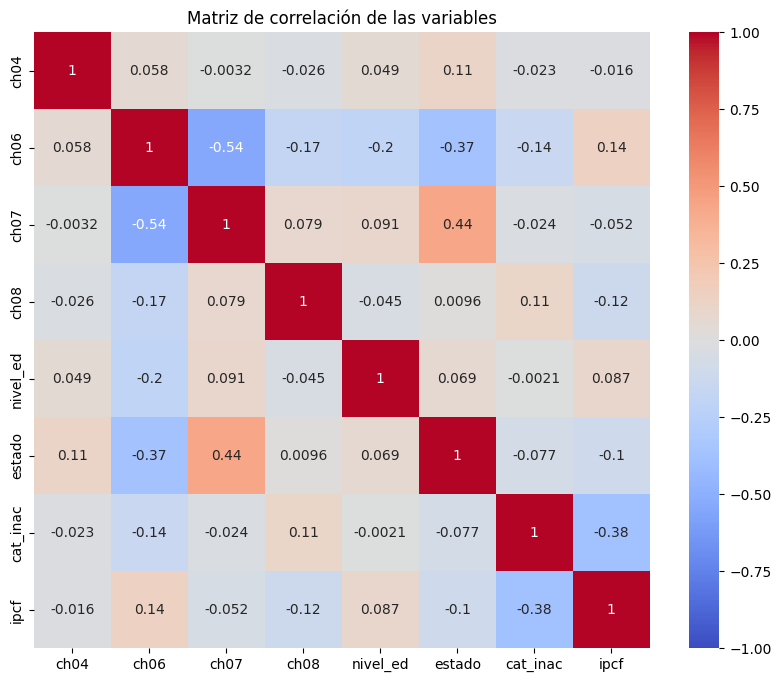

In [25]:
df_conjunto = pd.concat([df_2004, df_2024], axis=0)

# Asegúrate de que 'variables' contiene las columnas que deseas analizar
datos_filtrados = df_conjunto[variables]

# Convierte las columnas seleccionadas en 'variables' a numéricas, forzando errores a NaN
datos_filtrados = datos_filtrados.apply(pd.to_numeric, errors='coerce')

# Calcula la matriz de correlación
corr = datos_filtrados.corr()

# Crear un gráfico de calor para la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Matriz de correlación de las variables')
plt.show()

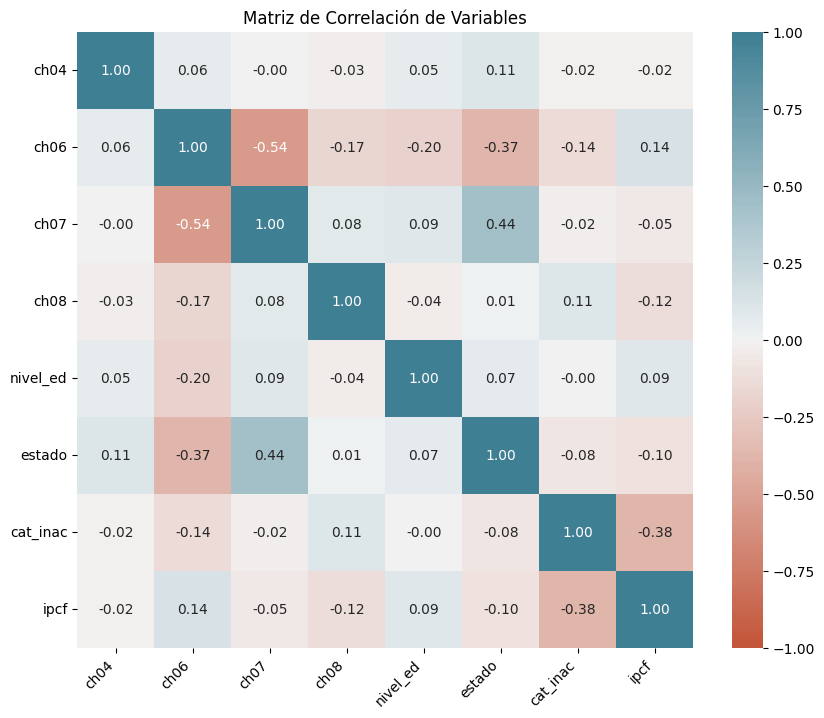

In [26]:
# Matriz de correlacion + el mapa de calor
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura según sea necesario
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,  # Para mostrar los valores de correlación en cada celda
    fmt=".2f"   # Formato de los valores en el mapa
)

# Configura las etiquetas de los ejes
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
)

# Muestra el mapa de calor
plt.title('Matriz de Correlación de Variables')
plt.show()

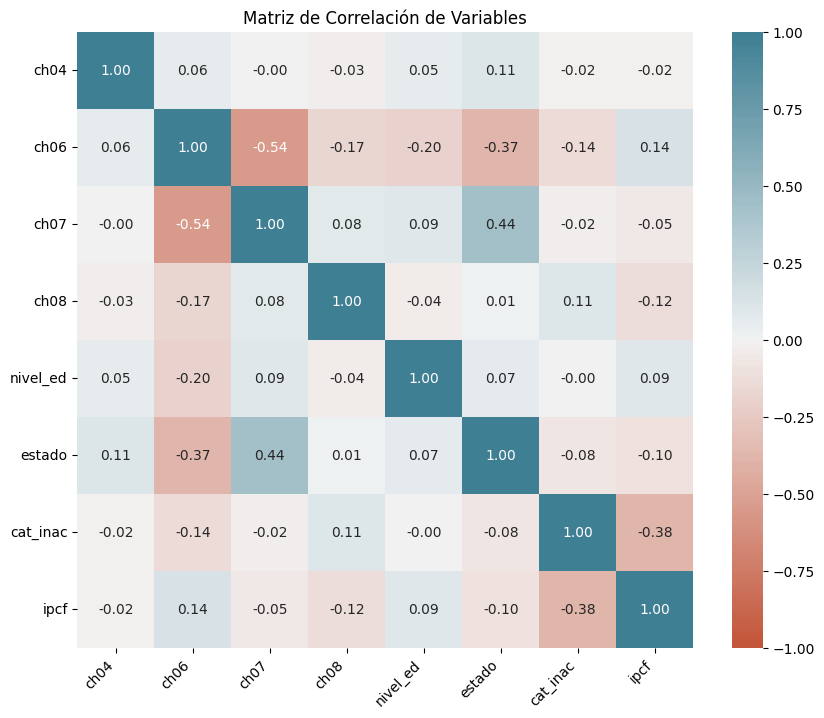

In [27]:
# Matriz de correlacion + el mapa de calor
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura según sea necesario
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,  # Para mostrar los valores de correlación en cada celda
    fmt=".2f"   # Formato de los valores en el mapa
)

# Configura las etiquetas de los ejes
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
)

# Muestra el mapa de calor
plt.title('Matriz de Correlación de Variables')
plt.show()

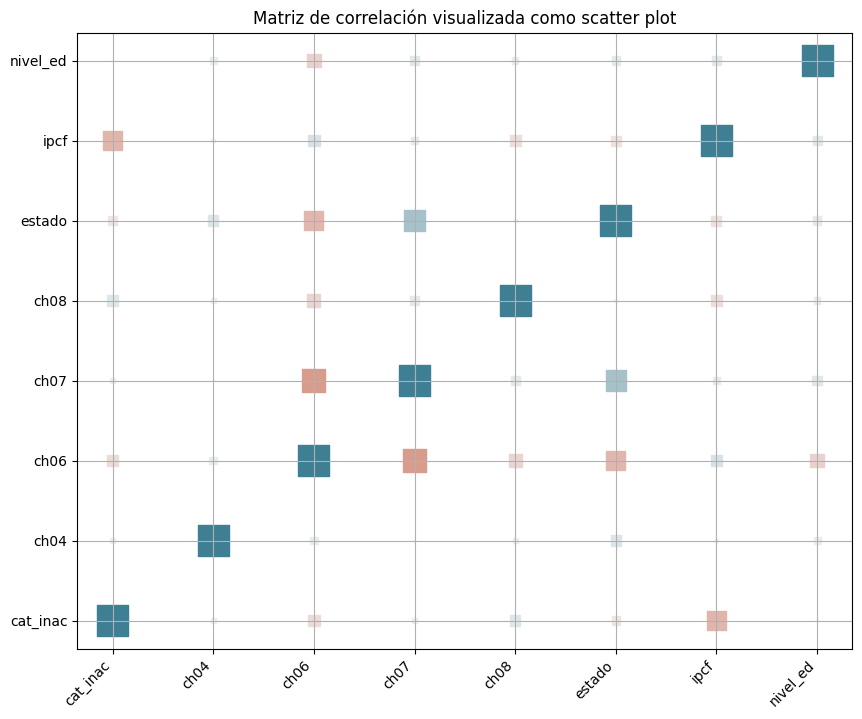

In [28]:
# Mejoramos la visualización de las correlaciones de la matriz 
datos_filtrados = datos_filtrados.apply(pd.to_numeric, errors='coerce')

# Calcular la matriz de correlación
corr = datos_filtrados.corr()

# Unpivot the dataframe, so we can get pairs of arrays for x and y
corr_melted = pd.melt(corr.reset_index(), id_vars='index') 
corr_melted.columns = ['x', 'y', 'value']

# Configuración de la paleta de colores
n_colors = 256  # Número de colores para la paleta divergente
palette = sns.diverging_palette(20, 220, n=n_colors)  # Crear la paleta
color_min, color_max = [-1, 1]  # Rango de valores que se mapearán a la paleta

# Función para mapear valores a colores
def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min)  # Posición del valor en el rango de entrada
    ind = int(val_position * (n_colors - 1))  # Índice objetivo en la paleta de colores
    return palette[ind]

# Define la función heatmap
def heatmap(x, y, size, color):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]: p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]: p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num),  # Use mapping for x
        y=y.map(y_to_num),  # Use mapping for y
        s=size * size_scale,  # Vector de tamaños de cuadrado, proporcional al parámetro size
        c=color.apply(value_to_color),  # Vector de colores de cuadrados, mapeado a la paleta de colores
        marker='s'  # Usar cuadrado como marcador de dispersión
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    plt.title('Matriz de correlación visualizada como scatter plot')
    plt.grid()
    plt.show()

# Llama a la función heatmap con tus datos de correlación
heatmap(
    x=corr_melted['x'],
    y=corr_melted['y'],
    size=corr_melted['value'].abs(),  # Usa el valor absoluto para el tamaño
    color=corr_melted['value']  # Usa los valores de correlación para el color
)


In [29]:

# Contar la cantidad de desocupados (estado == 2) e inactivos (estado == 3)
cantidad_desocupados = df_conjunto[df_conjunto['estado'] == 2].shape[0]
cantidad_inactivos = df_conjunto[df_conjunto['estado'] == 3].shape[0]

total = len(df_conjunto)

print(f"La cantidad de desocupados es {cantidad_desocupados}")
print(f"Representa un {round(cantidad_desocupados / total * 100, 2)}% del total")

print(f"La cantidad de inactivos es {cantidad_inactivos}")
print(f"Representa un {round(cantidad_inactivos / total * 100, 2)}% del total")


La cantidad de desocupados es 3768
Representa un 4.47% del total
La cantidad de inactivos es 33762
Representa un 40.06% del total


In [30]:
# Media de ingreso per cápita familiar (IPCF) según estado
media_ipcf_por_estado = df_conjunto.groupby('estado')['ipcf'].mean()

# Mostrar media de IPCF
print("\nMedia de ingreso per cápita familiar (ipcf) según estado:")
print(media_ipcf_por_estado)



Media de ingreso per cápita familiar (ipcf) según estado:
estado
0       50.379365
1    93698.252915
2    28536.149239
3    68569.233460
4    43997.566056
Name: ipcf, dtype: float64


In [31]:
df_conjunto['estado'].unique()

array([3, 1, 2, 4, 0])

In [32]:
#ejercicio 3
# Filtrar el DataFrame
respondieron = df_conjunto[df_conjunto['estado'] != 0]

# Contar el número de personas que respondieron
cantidad_personas = respondieron.shape[0]
print(f"La cantidad de personas que sí respondieron su condición de actividad es: {cantidad_personas}")


La cantidad de personas que sí respondieron su condición de actividad es: 84213


In [33]:
print(df_conjunto.columns)

Index(['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr',
       'pdeccfr', 'adeccfr', 'anio'],
      dtype='object', length=173)


In [34]:
no_respondieron = df_conjunto[df_conjunto['estado'] == 0]
cantidad_personas_no_respondieron = no_respondieron.shape[0]
print(f"La cantidad de personas que no respondieron su condición de actividad es: {cantidad_personas_no_respondieron}")

La cantidad de personas que no respondieron su condición de actividad es: 75


In [35]:
respondieron = df_conjunto[df_conjunto['estado'] != 0].copy()  #redefino respondieron como copy para que no salte SettingWithCopyWarning.


In [36]:
print(respondieron.columns)


Index(['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr',
       'pdeccfr', 'adeccfr', 'anio'],
      dtype='object', length=173)


Tipo de datos de 'estado': int64
Valores únicos en 'estado': [3 1 2 4]


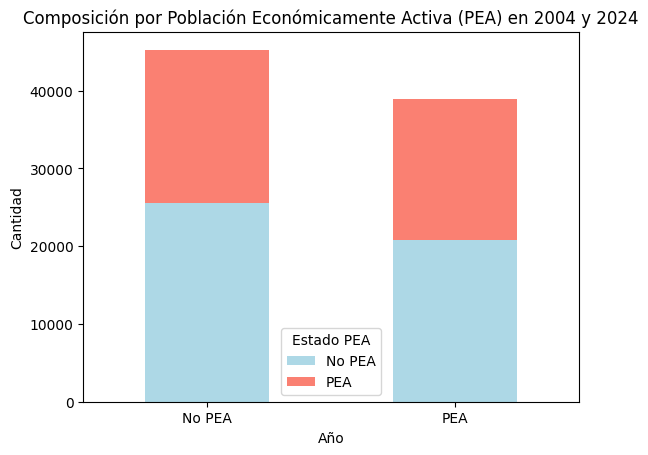

In [37]:
# Definir los valores que son PEA
estados_pea = [1, 2]  # Ocupado y Desocupado

# Imprimir tipos de datos y valores únicos para depuración
print("Tipo de datos de 'estado':", respondieron['estado'].dtype)
print("Valores únicos en 'estado':", respondieron['estado'].unique())

# Crear la columna PEA en el DataFrame `respondieron`
try:
    respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in estados_pea else 0)
except Exception as e:
    print("Error al crear la columna PEA:", e)

# Filtrar los datos por año
pea_2004 = respondieron[respondieron['anio'] == 2004]['PEA'].value_counts()
pea_2024 = respondieron[respondieron['anio'] == 2024]['PEA'].value_counts()

# Crear un DataFrame con la información para el gráfico
pea_data = pd.DataFrame({
    '2004': pea_2004,
    '2024': pea_2024
}).transpose()

# Graficar los datos
pea_data.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Composición por Población Económicamente Activa (PEA) en 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['No PEA', 'PEA'], rotation=0)  # Ajusta las etiquetas del eje x
plt.legend(title='Estado PEA', labels=['No PEA', 'PEA'])
plt.show()


In [38]:
#ejercicio 4

# Confirmar los valores únicos en `estado` en el DataFrame `respondieron`
print("Valores únicos en la columna estado:", respondieron["estado"].unique())
# esta ok por que elimino el 0 osea los 'Entrevista individual no realizada (no respuesta al cuestion"



Valores únicos en la columna estado: [3 1 2 4]


In [39]:
# Convertir la columna `PEA` según los valores numéricos
# Supongamos que "Ocupado" corresponde a 1 y "Desocupado" a 2 (según tu asignación previa)
respondieron.loc[:, "PEA"] = respondieron["estado"].apply(lambda x: 1 if x in [1, 2] else 0)

# Verifica los valores únicos en la nueva columna `PEA`
print("Valores únicos en la columna PEA:", respondieron["PEA"].unique())

Valores únicos en la columna PEA: [0 1]


In [40]:
# Filtrar los dataframes para 2004 y 2024
respondieron_2004 = respondieron[respondieron['anio'] == 2004]
respondieron_2024 = respondieron[respondieron['anio'] == 2024]

# Contar la cantidad de PEA en cada año
pea_counts = pd.DataFrame({
    'Ano4': ['2004', '2024'],
    'PEA': [respondieron_2004['PEA'].sum(), respondieron_2024['PEA'].sum()],
    'No PEA': [respondieron_2004['PEA'].count() - respondieron_2004['PEA'].sum(),
               respondieron_2024['PEA'].count() - respondieron_2024['PEA'].sum()]
})


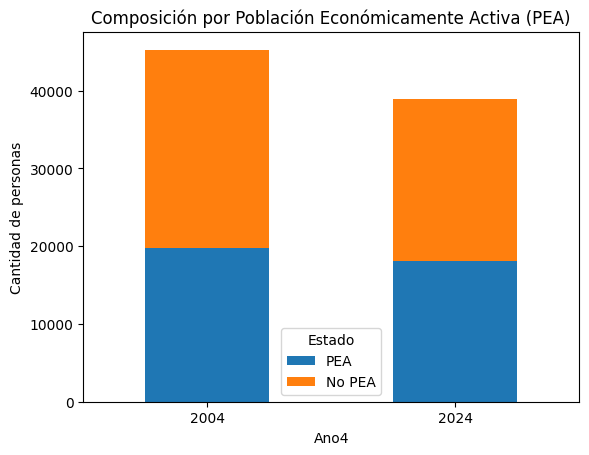

In [41]:
# Graficar
pea_counts.set_index('Ano4').plot(kind='bar', stacked=True)
plt.title('Composición por Población Económicamente Activa (PEA)')
plt.ylabel('Cantidad de personas')
plt.xlabel('Ano4')
plt.xticks(rotation=0)
plt.legend(title='Estado', labels=['PEA', 'No PEA'])
plt.show()


In [42]:
print("PEA para 2024:", respondieron_2024['PEA'].sum())
print("No PEA para 2024:", respondieron_2024['PEA'].count() - respondieron_2024['PEA'].sum())

print("PEA para 2004:", respondieron_2004['PEA'].sum())

PEA para 2024: 18152
No PEA para 2024: 20807
PEA para 2004: 19739


In [43]:
#ejercicio 5
respondieron["ch06"].unique()

array([ 79.,  67.,  74.,  54.,  51.,  25.,  20.,  55.,  48.,  17.,  15.,
        77.,  50.,  49.,  26.,  22.,  18.,  86.,  62.,  76.,  45.,  41.,
        21.,  31.,  19.,  52.,  12.,  32.,  29.,  64.,  10.,  47.,  43.,
        13.,   3.,  46.,  78.,  60.,  59.,  37.,  44.,  30.,  63.,  71.,
        87.,  34.,  14.,  24.,  28.,  27.,  69.,  56.,  33.,  66.,  61.,
         1.,  92.,   0.,  65.,  57.,  23.,   4.,  40.,  16.,   9.,  83.,
         6.,  38.,  75.,  11.,  53.,  73.,  39.,  35.,   7.,   5.,  36.,
         8.,  82.,  85.,  72.,  70.,  89.,  42.,   2.,  58.,  68.,  81.,
        80.,  93.,  96.,  84.,  90.,  94.,  88.,  91.,  97.,  95.,  -1.,
        98.,  99., 101., 100.])

In [44]:
respondieron = df_conjunto[df_conjunto['estado'] != 0].copy()  #redefino respondieron como copy para que no salte SettingWithCopyWarning.

# Convertir la columna 'ch06' a numérico
respondieron['ch06'] = pd.to_numeric(respondieron['ch06'], errors='coerce')

# Crear la columna PET
respondieron['PET'] = respondieron['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)


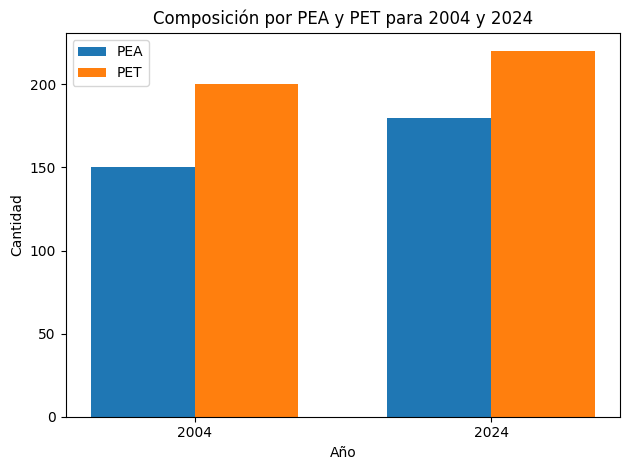

In [45]:
pea_pet_counts = pd.DataFrame({
    'Año': ['2004', '2024'],
    'PEA': [150, 180],  # Sustituye por los valores reales
    'PET': [200, 220]   # Sustituye por los valores reales
})

# Configurar el gráfico
bar_width = 0.35
index = range(len(pea_pet_counts))

# Crear el gráfico de barras
plt.bar(index, pea_pet_counts['PEA'], bar_width, label='PEA')
plt.bar([i + bar_width for i in index], pea_pet_counts['PET'], bar_width, label='PET')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Composición por PEA y PET para 2004 y 2024')
plt.xticks([i + bar_width / 2 for i in index], pea_pet_counts['Año'])
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [46]:
print(respondieron['estado'].unique())


[3 1 2 4]


In [47]:
#ejercicio 6
# Revisar los valores únicos y sus frecuencias en 'estado'
print(respondieron['estado'].value_counts())
print(respondieron.columns)

estado
1    34123
3    33762
4    12560
2     3768
Name: count, dtype: int64
Index(['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr',
       'adeccfr', 'anio', 'PET'],
      dtype='object', length=174)


In [48]:
# Crear la columna 'desocupado' ajustando según los valores confirmados de 'estado'
respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)

# Contar el número de personas desocupadas por año
desocupados_counts = respondieron.groupby("anio")['desocupado'].sum().reset_index()

# Mostrar el resultado
print(desocupados_counts)


   anio  desocupado
0  2004       19739
1  2024       18152


In [49]:
import pandas as pd

# Listado de códigos que representan "No sabe / No responde"
no_sabe_codes = [9, 99, 999, 9999]

# Hacer una copia del DataFrame para preservar el original
df_imputado = respondieron.copy()

# Imputación automática
for column in df_imputado.columns:
    # Reemplazar códigos de "No sabe / No responde" con NaN
    df_imputado[column] = df_imputado[column].replace(no_sabe_codes, pd.NA)
    
    # Verificar si es una variable numérica o categórica
    if df_imputado[column].dtype in ['int64', 'float64']:
        # Imputar valores faltantes con la mediana para variables numéricas
        median_value = df_imputado[column].median()
        df_imputado[column].fillna(median_value, inplace=True)
    else:
        # Imputar valores faltantes con la moda para variables categóricas
        mode_value = df_imputado[column].mode()[0]
        df_imputado[column].fillna(mode_value, inplace=True)

# Mostrar un resumen para verificar el éxito de la imputación
print("Imputación completada. Resumen de datos faltantes por columna:")
print(df_imputado.isnull().sum())

/var/folders/jd/960pnt4n4bbc4l7wrn7x50600000gn/T/ipykernel_11466/2883611958.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputado[column].fillna(mode_value, inplace=True)
/var/folders/jd/960pnt4n4bbc4l7wrn7x50600000gn/T/ipykernel_11466/2883611958.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

Imputación completada. Resumen de datos faltantes por columna:
codusu        0
nro_hogar     0
componente    0
h15           0
ano4          0
             ..
pdeccfr       0
adeccfr       0
anio          0
PET           0
desocupado    0
Length: 175, dtype: int64


In [50]:
from sklearn.impute import SimpleImputer
import numpy as np

# Crear un imputador para reemplazar los valores con la media de cada columna
imputador = SimpleImputer(missing_values=np.nan, strategy='mean')

# Recorrer las columnas del DataFrame y reemplazar los valores 9, 99, 999, y 9999 con NaN para imputarlos
for col in respondieron.columns:
    # Reemplazar solo si alguno de los valores está en la columna
    if respondieron[col].isin([9, 99, 999, 9999]).any():
        respondieron[col] = respondieron[col].replace([9, 99, 999, 9999], np.nan)

# Imputar los valores NaN generados con la media de cada columna
respondieron[:] = imputador.fit_transform(respondieron)

# Verificar nuevamente si aún quedan valores "No sabe / No responde"
valores_a_chequear = [9, 99, 999, 9999]
for valor in valores_a_chequear:
    columnas_con_valor = (respondieron == valor).any()
    columnas_con_valor = columnas_con_valor[columnas_con_valor].index.tolist()
    
    if columnas_con_valor:
        print(f"Quedan valores {valor} en las columnas: {columnas_con_valor}")
    else:
        print(f"No quedan valores {valor} en ninguna columna.")

print("Proceso de imputación finalizado.")


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'TQRMNOPUTHLMKQCDEGGFB00852588'

In [ ]:
# Verificar si quedan valores 9, 99, 999 o 9999 en el DataFrame 'respondieron'
valores_a_chequear = [9, 99, 999, 9999]
for valor in valores_a_chequear:
    columnas_con_valor = (respondieron == valor).any()
    columnas_con_valor = columnas_con_valor[columnas_con_valor].index.tolist()
    
    if columnas_con_valor:
        print(f"Quedan valores {valor} en las columnas: {columnas_con_valor}")
    else:
        print(f"No quedan valores {valor} en ninguna columna.")

# Mostrar si algún valor de 'No sabe / No responde' sigue en el DataFrame
print("Verificación completa.")

In [51]:
#PARTE DOS

In [52]:
#para la parte dos me quedo con las columnas de la matriz de corr + año y descupado
respondieron = datos_filtrados[datos_filtrados['estado'] != 0].copy()  #redefino respondieron como copy para que no salte SettingWithCopyWarning.

# Crear una copia del DataFrame para cada año
respondieron_2004 = respondieron.copy()
respondieron_2024 = respondieron.copy()

# Asignar el año correspondiente a cada DataFrame
respondieron_2004['anio'] = 2004
respondieron_2024['anio'] = 2024

# Concatenar ambos DataFrames en uno solo
respondieron = pd.concat([respondieron_2004, respondieron_2024], ignore_index=True)
respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)

print(respondieron.columns)


Index(['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac',
       'ipcf', 'anio', 'desocupado'],
      dtype='object')


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [54]:
respondieron['unos']=1

In [55]:
datos2024=respondieron[respondieron['anio']==2024]
datos2004=respondieron[respondieron['anio']==2004]
datos2004 = datos2004.dropna(subset=['estado'])

In [56]:
x2024=datos2024[['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'ipcf','unos']]
y2024=datos2024['desocupado']
x2004=datos2004[['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'ipcf','unos']]
y2004=datos2004['desocupado']

In [57]:
# Partimos la base año 2024
xtrain2024, xtest2024, ytrain2024, ytest2024 = train_test_split(x2024, y2024, test_size=0.7, random_state=101)
# Partimos la base año 2004
xtrain2004, xtest2004, ytrain2004, ytest2004 = train_test_split(x2004, y2004, test_size=0.7, random_state=101)

In [62]:
#chequeo de la particion para 2024
cantidad_total2 = x2024.shape[0]
cantidad_train2 = xtest2024.shape[0]
cantidad_test2 = xtest2024.shape[0]

print(f"Proporción entrenamiento 2024: {round(cantidad_train2 / cantidad_total2, 2)*100}%")
print(f"Proporción prueba 2024: {round(cantidad_test2  / cantidad_total2, 2)*100}%")

#mismo para 2004
cantidad_total = x2004.shape[0]
cantidad_train = xtrain2004.shape[0]
cantidad_test = xtest2004.shape[0]

print(f"Proporción entrenamiento 2004: {round(cantidad_train / cantidad_total, 2)*100}%")
print(f"Proporción prueba 2004: {round(cantidad_test  / cantidad_total, 2)*100}%")


Proporción entrenamiento 2024: 70.0%
Proporción prueba 2024: 70.0%
Proporción entrenamiento 2004: 30.0%
Proporción prueba 2004: 70.0%


In [63]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Crear un pipeline para la imputación y escalado
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
    ('scaler', StandardScaler())  # Escalar las características
])

# Preprocesar y escalar los datos de 2024
xtrain2024_preprocessed = preprocessing_pipeline.fit_transform(xtrain2024)
xtest2024_preprocessed = preprocessing_pipeline.transform(xtest2024)

# Preprocesar y escalar los datos de 2004
xtrain2004_preprocessed = preprocessing_pipeline.fit_transform(xtrain2004)
xtest2004_preprocessed = preprocessing_pipeline.transform(xtest2004)

# Entrenar los modelos con los datos preprocesados
log2024 = LogisticRegression(penalty=None, max_iter=1000).fit(xtrain2024_preprocessed, ytrain2024)
log2004 = LogisticRegression(penalty=None, max_iter=1000).fit(xtrain2004_preprocessed, ytrain2004)


Matriz de confusión para 2004:
[[32333     3]
 [    0 26614]]


Accuracy para 2004: 0.9999491094147582


AUC para 2004: 1.000
Thresholds: [inf  1.  1. ...  0.  0.  0.]
FPR: [0.         0.         0.         ... 0.99947427 0.99953612 1.        ]
TPR: [0.         0.00003757 0.00928083 ... 1.         1.         1.        ]


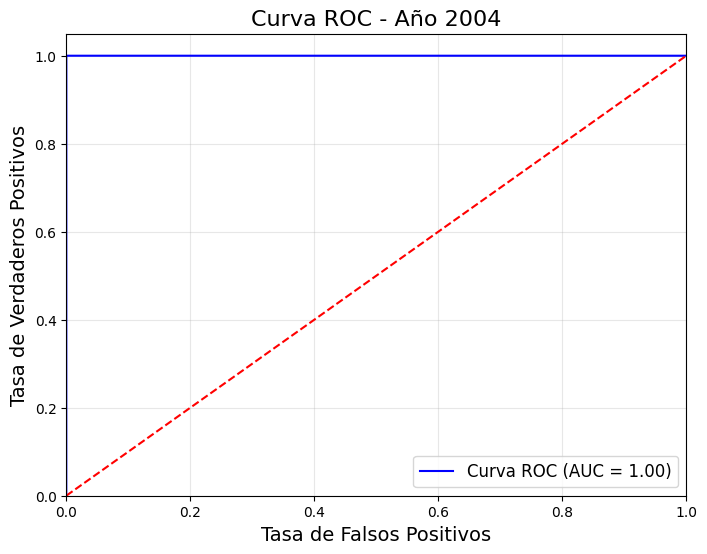

Área bajo la curva (AUC) para 2004: 1.00


In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Generar las predicciones y las probabilidades de predicción
y_pred_2004 = log2004.predict(xtest2004_preprocessed)
y_pred_prob_2004 = log2004.predict_proba(xtest2004_preprocessed)[:, 1]

# Matriz de confusión
matriz_confusion_2004 = confusion_matrix(ytest2004, y_pred_2004)
print("Matriz de confusión para 2004:")
print(matriz_confusion_2004)
print("\n")
print('Accuracy para 2004:', accuracy_score(ytest2004, y_pred_2004))
print("\n")

# Calcular la curva ROC y el AUC
curvaauc_2004 = roc_auc_score(ytest2004, y_pred_prob_2004)
print('AUC para 2004: %.3f' % curvaauc_2004)

fpr_2004, tpr_2004, thresholds_2004 = roc_curve(ytest2004, y_pred_prob_2004)
np.set_printoptions(suppress=True)
print('Thresholds:', thresholds_2004)
print('FPR:', fpr_2004)
print('TPR:', tpr_2004)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_2004, tpr_2004, color='blue', label=f'Curva ROC (AUC = {curvaauc_2004:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.title('Curva ROC - Año 2004', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Reportar el AUC
print(f"Área bajo la curva (AUC) para 2004: {curvaauc_2004:.2f}")


Matriz de confusión para 2024:
[[32333     3]
 [    0 26614]]

Accuracy para 2024: 0.9999491094147582
AUC para 2024: 1.000


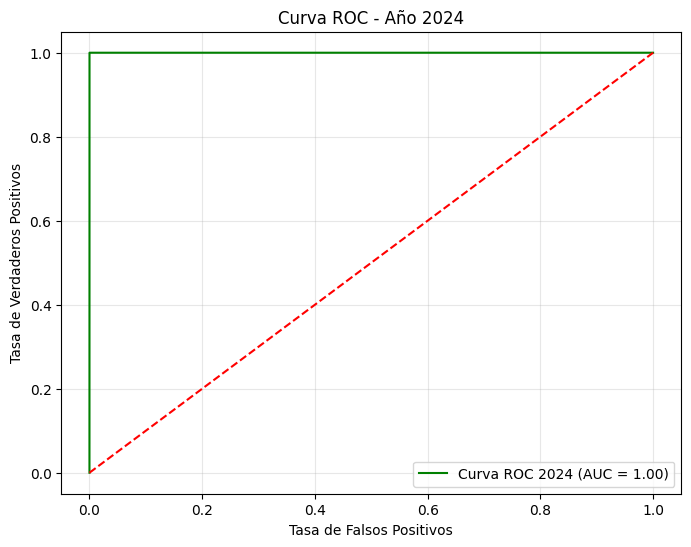

In [65]:
# Generar predicciones y probabilidades usando el conjunto de prueba para 2024
y_pred_2024 = log2024.predict(xtest2024_preprocessed)
y_pred_prob_2024 = log2024.predict_proba(xtest2024_preprocessed)[:, 1]

# Matriz de confusión para 2024
matriz_confusion_2024 = confusion_matrix(ytest2024, y_pred_2024)
print("Matriz de confusión para 2024:")
print(matriz_confusion_2024)

# Calcular y mostrar la precisión
print("\nAccuracy para 2024:", accuracy_score(ytest2024, y_pred_2024))

# Calcular y mostrar la curva ROC y el AUC para 2024
curvaauc_2024 = roc_auc_score(ytest2024, y_pred_prob_2024)
print(f'AUC para 2024: {curvaauc_2024:.3f}')

# Generar puntos para la curva ROC
fpr_2024, tpr_2024, thresholds_2024 = roc_curve(ytest2024, y_pred_prob_2024)
plt.figure(figsize=(8, 6))
plt.plot(fpr_2024, tpr_2024, color='green', label=f'Curva ROC 2024 (AUC = {curvaauc_2024:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Año 2024')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [66]:
#LDA
lda2024 = LinearDiscriminantAnalysis()
lda2004= LinearDiscriminantAnalysis()

# Entrenar el modelo con los datos de entrenamiento
lda2004.fit(xtrain2004_preprocessed, ytrain2004)
lda2024.fit(xtrain2024_preprocessed, ytrain2024)

# Predecir utilizando los datos de prueba
y_pred_lda2004 = lda2004.predict(xtest2004_preprocessed)
y_pred_lda2024 = lda2024.predict(xtest2024_preprocessed)

Matriz de confusión para 2004 (LDA):
[[32333     3]
 [  175 26439]]


Accuracy para 2004 (LDA): 0.996980491942324


AUC para 2004 (LDA): 0.9999909201858728
Thresholds para 2004: [inf  1.  1. ...  0.  0.  0.]
FPR para 2004: [0.         0.         0.         ... 0.99953612 0.99972167 1.        ]
TPR para 2004: [0.         0.00003757 0.00045089 ... 1.         1.         1.        ]


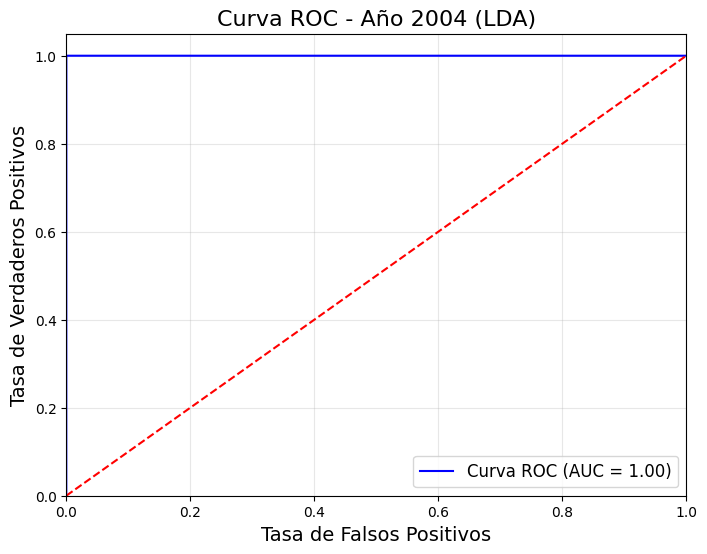

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Para 2004

# Predecir probabilidades para ROC y AUC
y_pred_prob_lda2004 = lda2004.predict_proba(xtest2004_preprocessed)[:, 1]
y_pred_lda2004 = lda2004.predict(xtest2004_preprocessed)

# Matriz de confusión para 2004
matriz_confusion_lda2004 = confusion_matrix(ytest2004, y_pred_lda2004)
print("Matriz de confusión para 2004 (LDA):")
print(matriz_confusion_lda2004)
print("\n")

# Accuracy para 2004
accuracy_lda2004 = accuracy_score(ytest2004, y_pred_lda2004)
print('Accuracy para 2004 (LDA):', accuracy_lda2004)
print("\n")

# Calcular la curva ROC y el AUC para 2004
curva_auc_lda2004 = roc_auc_score(ytest2004, y_pred_prob_lda2004)
print('AUC para 2004 (LDA):', curva_auc_lda2004)

fpr_lda2004, tpr_lda2004, thresholds_lda2004 = roc_curve(ytest2004, y_pred_prob_lda2004)
print('Thresholds para 2004:', thresholds_lda2004)
print('FPR para 2004:', fpr_lda2004)
print('TPR para 2004:', tpr_lda2004)

# Graficar la curva ROC para 2004
plt.figure(figsize=(8, 6))
plt.plot(fpr_lda2004, tpr_lda2004, color='blue', label=f'Curva ROC (AUC = {curva_auc_lda2004:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.title('Curva ROC - Año 2004 (LDA)', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


Matriz de confusión para 2024 (LDA):
[[32333     3]
 [  175 26439]]


Accuracy para 2024 (LDA): 0.996980491942324


AUC para 2024 (LDA): 0.9999909201858728
Thresholds para 2024: [inf  1.  1. ...  0.  0.  0.]
FPR para 2024: [0.         0.         0.         ... 0.99953612 0.99972167 1.        ]
TPR para 2024: [0.         0.00003757 0.00045089 ... 1.         1.         1.        ]


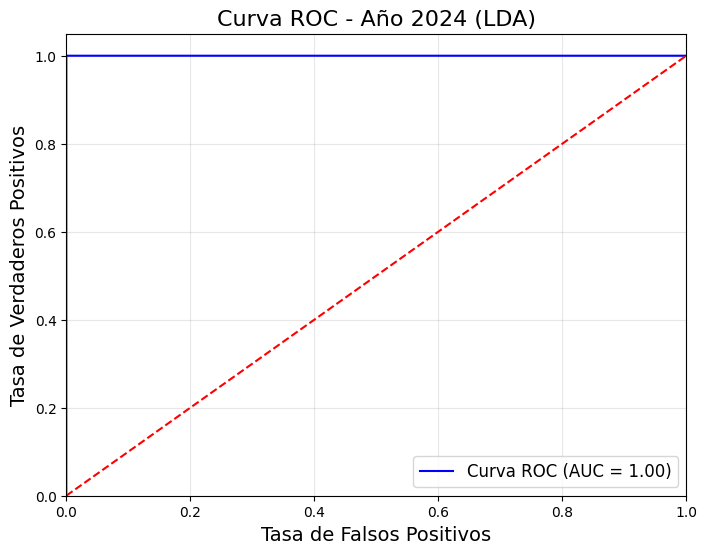

In [68]:

# Para 2024

# Predecir probabilidades para ROC y AUC
y_pred_prob_lda2024 = lda2024.predict_proba(xtest2024_preprocessed)[:, 1]
y_pred_lda2024 = lda2024.predict(xtest2024_preprocessed)

# Matriz de confusión para 2024
matriz_confusion_lda2024 = confusion_matrix(ytest2024, y_pred_lda2024)
print("Matriz de confusión para 2024 (LDA):")
print(matriz_confusion_lda2024)
print("\n")

# Accuracy para 2024
accuracy_lda2024 = accuracy_score(ytest2024, y_pred_lda2024)
print('Accuracy para 2024 (LDA):', accuracy_lda2024)
print("\n")

# Calcular la curva ROC y el AUC para 2024
curva_auc_lda2024 = roc_auc_score(ytest2024, y_pred_prob_lda2024)
print('AUC para 2024 (LDA):', curva_auc_lda2024)

fpr_lda2024, tpr_lda2024, thresholds_lda2024 = roc_curve(ytest2024, y_pred_prob_lda2024)
print('Thresholds para 2024:', thresholds_lda2024)
print('FPR para 2024:', fpr_lda2024)
print('TPR para 2024:', tpr_lda2024)

# Graficar la curva ROC para 2024
plt.figure(figsize=(8, 6))
plt.plot(fpr_lda2024, tpr_lda2024, color='blue', label=f'Curva ROC (AUC = {curva_auc_lda2024:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.title('Curva ROC - Año 2024 (LDA)', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [72]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn2004 = KNeighborsClassifier(n_neighbors=3)
knn2024 = KNeighborsClassifier(n_neighbors=3)

knn2004 = knn2004.fit(xtrain2004_preprocessed, ytrain2004)
knn2024 = knn2024.fit(xtrain2024_preprocessed, ytrain2024)


Matriz de Confusión para 2004 (KNN):
[[32311    25]
 [   19 26595]]
Accuracy para 2004 (KNN): 0.999253604749788
AUC para 2004 (KNN): 0.9997963845291011


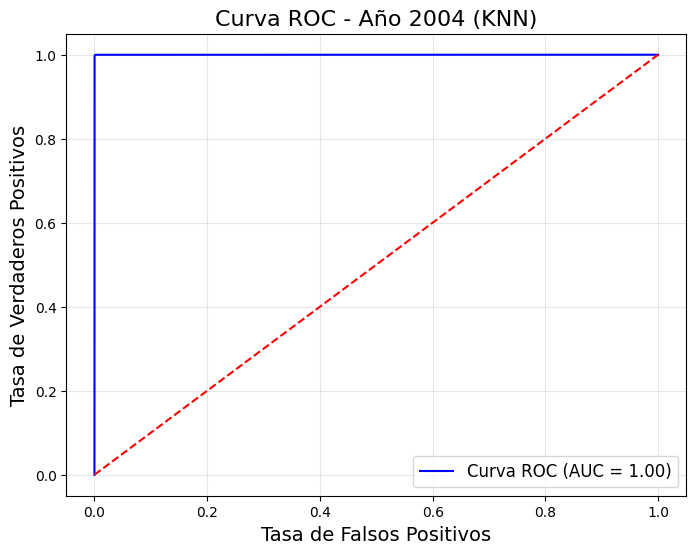

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Para 2004
y_pred_knn2004 = knn2004.predict(xtest2004_preprocessed)
y_pred_prob_knn2004 = knn2004.predict_proba(xtest2004_preprocessed)[:, 1]

# Matriz de Confusión para 2004
matriz_confusion_knn2004 = confusion_matrix(ytest2004, y_pred_knn2004)
print("Matriz de Confusión para 2004 (KNN):")
print(matriz_confusion_knn2004)

# Accuracy para 2004
accuracy_knn2004 = accuracy_score(ytest2004, y_pred_knn2004)
print("Accuracy para 2004 (KNN):", accuracy_knn2004)

# AUC y Curva ROC para 2004
curva_auc_knn2004 = roc_auc_score(ytest2004, y_pred_prob_knn2004)
print("AUC para 2004 (KNN):", curva_auc_knn2004)

fpr_knn2004, tpr_knn2004, thresholds_knn2004 = roc_curve(ytest2004, y_pred_prob_knn2004)

# Graficar Curva ROC para 2004
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn2004, tpr_knn2004, color='blue', label=f'Curva ROC (AUC = {curva_auc_knn2004:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.title('Curva ROC - Año 2004 (KNN)', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()



Matriz de Confusión para 2024 (KNN):
[[32311    25]
 [   19 26595]]
Accuracy para 2024 (KNN): 0.999253604749788
AUC para 2024 (KNN): 0.9997963845291011


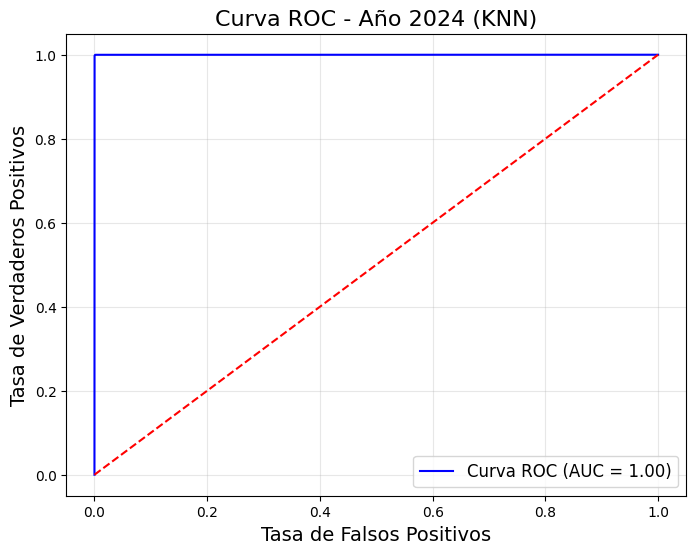

In [74]:
# Para 2024
y_pred_knn2024 = knn2024.predict(xtest2024_preprocessed)
y_pred_prob_knn2024 = knn2024.predict_proba(xtest2024_preprocessed)[:, 1]

# Matriz de Confusión para 2024
matriz_confusion_knn2024 = confusion_matrix(ytest2024, y_pred_knn2024)
print("Matriz de Confusión para 2024 (KNN):")
print(matriz_confusion_knn2024)

# Accuracy para 2024
accuracy_knn2024 = accuracy_score(ytest2024, y_pred_knn2024)
print("Accuracy para 2024 (KNN):", accuracy_knn2024)

# AUC y Curva ROC para 2024
curva_auc_knn2024 = roc_auc_score(ytest2024, y_pred_prob_knn2024)
print("AUC para 2024 (KNN):", curva_auc_knn2024)

fpr_knn2024, tpr_knn2024, thresholds_knn2024 = roc_curve(ytest2024, y_pred_prob_knn2024)

# Graficar Curva ROC para 2024
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn2024, tpr_knn2024, color='blue', label=f'Curva ROC (AUC = {curva_auc_knn2024:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.title('Curva ROC - Año 2024 (KNN)', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [75]:
from sklearn.naive_bayes import GaussianNB

# Definir los modelos Naive Bayes para 2024 y 2004
nb2024 = GaussianNB()
nb2004 = GaussianNB()

# Entrenar el modelo nb2024 con los datos de 2024
nb2024 = nb2024.fit(xtrain2024_preprocessed, ytrain2024)

# Entrenar el modelo nb2004 con los datos de 2004
nb2004 = nb2004.fit(xtrain2004_preprocessed, ytrain2004)

# Predicciones y probabilidades para Naive Bayes 2024
y_pred_nb2024 = nb2024.predict(xtest2024_preprocessed)  # Usar datos de prueba
y_prob_nb2024 = nb2024.predict_proba(xtest2024_preprocessed)[:, 1]  # Probabilidades para la clase positiva

# Predicciones y probabilidades para Naive Bayes 2004 (si lo necesitas)
y_pred_nb2004 = nb2004.predict(xtest2004_preprocessed)  # Usar datos de prueba
y_prob_nb2004 = nb2004.predict_proba(xtest2004_preprocessed)[:, 1]  # Probabilidades para la clase positiva


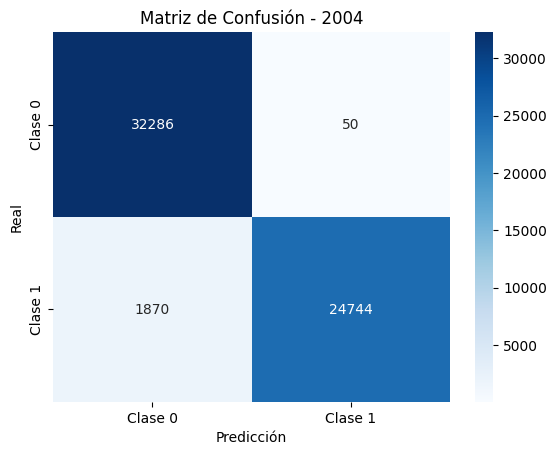

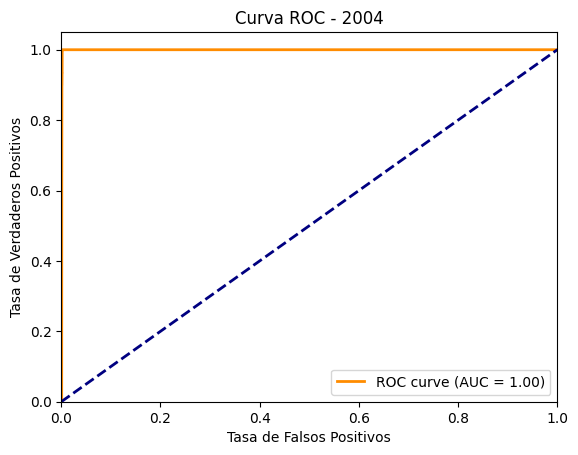

AUC - 2004: 1.00
Accuracy - 2004: 0.97


In [76]:
# Para 2004
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

#1. Matriz de Confusión para 2004
conf_matrix_2004 = confusion_matrix(ytest2004, y_pred_nb2004)  # Usa las etiquetas reales de prueba de 2004
sns.heatmap(conf_matrix_2004, annot=True, fmt="d", cmap="Blues", xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.title("Matriz de Confusión - 2004")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# 2. Curva ROC para 2004
fpr_2004, tpr_2004, thresholds_2004 = roc_curve(ytest2004, y_prob_nb2004)  # Probabilidades para la clase positiva de 2004
roc_auc_2004 = auc(fpr_2004, tpr_2004)

plt.figure()
plt.plot(fpr_2004, tpr_2004, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_2004:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - 2004')
plt.legend(loc="lower right")
plt.show()

# 3. AUC (Área bajo la curva ROC) para 2004
print(f"AUC - 2004: {roc_auc_2004:.2f}")

# 4. Accuracy para 2004
accuracy_nb2004 = accuracy_score(ytest2004, y_pred_nb2004)
print(f"Accuracy - 2004: {accuracy_nb2004:.2f}")


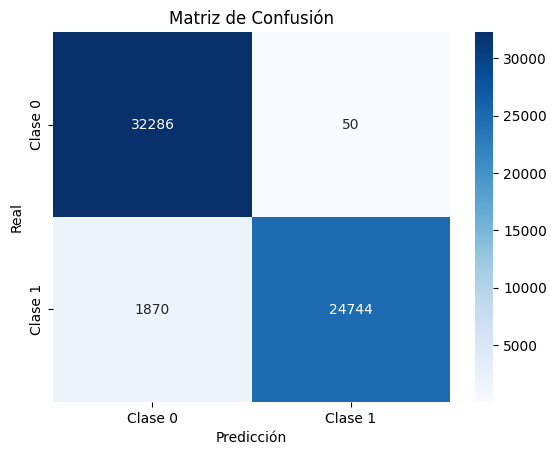

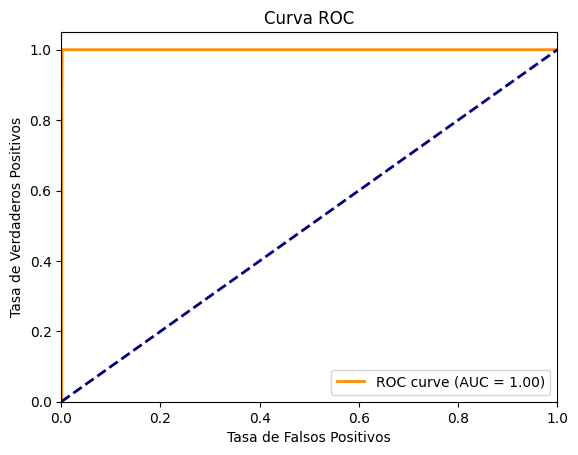

AUC: 1.00
Accuracy: 0.97


In [78]:
#para 2024
# 1. Matriz de Confusión
conf_matrix = confusion_matrix(ytest2024, y_pred_nb2024)  # Usa las etiquetas reales de prueba
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# 2. Curva ROC
fpr, tpr, thresholds = roc_curve(ytest2024, y_prob_nb2024)  # Probabilidades para la clase positiva
roc_aucnb2024 = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_aucnb2024:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# 3. AUC (Área bajo la curva ROC)
print(f"AUC: {roc_aucnb2024:.2f}")

# 4. Accuracy
accuracy_nb2024 = accuracy_score(ytest2024, y_pred_nb2024)
print(f"Accuracy: {accuracy_nb2024:.2f}")


In [79]:
#3) 



# Datos para 2004
data2004 = {
    'Modelo': ['Regresión Logística', 'LDA', 'KNN', 'Naive Bayes'],
    'Precisión': [accuracy_score, accuracy_lda2004, accuracy_knn2004, accuracy_nb2004],
    'AUC': [curvaauc_2004, curva_auc_lda2004, curva_auc_knn2004, roc_auc_2004]
}

# Datos para 2024
data2024 = {
    'Modelo': ['Regresión Logística', 'LDA', 'KNN', 'Naive Bayes'],
    'Precisión': [accuracy_score, accuracy_lda2024, accuracy_knn2024, accuracy_nb2024],
    'AUC': [curvaauc_2024, curva_auc_lda2024, curva_auc_knn2024, roc_aucnb2024]
}

df2004 = pd.DataFrame(data2004)
df2024 = pd.DataFrame(data2024)

#Hago las tablas
print("2004:")
print(df2004)

print("2024:")
print(df2024)

2004:
                Modelo                                 Precisión       AUC
0  Regresión Logística  <function accuracy_score at 0x1440c1260>  0.999991
1                  LDA                                   0.99698  0.999991
2                  KNN                                  0.999254  0.999796
3          Naive Bayes                                   0.96743  0.998912
2024:
                Modelo                                 Precisión       AUC
0  Regresión Logística  <function accuracy_score at 0x1440c1260>  0.999991
1                  LDA                                   0.99698  0.999991
2                  KNN                                  0.999254  0.999796
3          Naive Bayes                                   0.96743  0.998912


In [80]:
# Filtrar los datos para "no respondieron"
no_respondieron = datos_filtrados[datos_filtrados['estado'] == 0].copy()  # "estado" == 0 representa "no respondieron"

# Crear una copia del DataFrame para cada año
no_respondieron_2004 = no_respondieron.copy()
no_respondieron_2024 = no_respondieron.copy()

# Asignar el año correspondiente a cada DataFrame
no_respondieron_2004['anio'] = 2004
no_respondieron_2024['anio'] = 2024

# Concatenar ambos DataFrames en uno solo
no_respondieron = pd.concat([no_respondieron_2004, no_respondieron_2024], ignore_index=True)
no_respondieron['desocupado'] = no_respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)

print(no_respondieron.columns)


Index(['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac',
       'ipcf', 'anio', 'desocupado'],
      dtype='object')


In [81]:
# 4)
 # Mapeo para la columna "ch04" (Sexo)
ch04_mapping = {
    "Varón": 0,
    "Mujer": 1
}
no_respondieron["ch04"] = no_respondieron["ch04"].replace(ch04_mapping)

# Mapeo para la columna "ch07" (Estado civil)
ch07_mapping = {
    "Unido": 1,
    "Casado": 2,
    "Separado o divorciado": 3,
    "Viudo": 4,
    "Soltero": 5
}
no_respondieron["ch07"] = no_respondieron["ch07"].replace(ch07_mapping)

# Mapeo para la columna "ch08" (Cobertura médica)
ch08_mapping = {
    "Obra social (incluye PAMI)": 1,
    "Mutual/Prepaga/Servicio de emergencia": 2,
    "Planes y seguros públicos": 3,
    "No paga ni le descuentan": 4,
    "Ns./Nr.": 9,
    "Obra social y mutual/prepaga/servicio de emergencia": 12,
    "Obra social y planes y seguros públicos": 13,
    "Mutual/prepaga/servicio de emergencia/planes y seguros públicos": 23,
    "Mutual/prepaga/servicio de emergencia/planes y seguros públi": 23,
    "Obra social, mutual/prepaga/servicio de emergencia y planes": 123
}
no_respondieron["ch08"] = no_respondieron["ch08"].replace(ch08_mapping)

# Reemplazar los valores que comienzan con "Entrevista individual no realizada"
no_respondieron['estado'] = no_respondieron['estado'].replace(
    'Entrevista individual no realizada (no respuesta al cuestion', 'Entrevista no realizada'
)

# Mapeo para la columna "estado" (Condición de actividad)
estado_mapping = {
    "Entrevista no realizada": 0,
    "Ocupado": 1,
    "Desocupado": 2,
    "Inactivo": 3,
    "Menor de 10 años": 4
}
no_respondieron["estado"] = no_respondieron["estado"].replace(estado_mapping)

# Mapeo para la columna "cat_inac" (Categoría de inactividad)
cat_inac_mapping = {
    "Jubilado/pensionado": 1,
    "Rentista": 2,
    "Estudiante": 3,
    "Ama de casa": 4,
    "Menor de 6 años": 5,
    "Discapacitado": 6,
    "Otros": 7
}
no_respondieron["cat_inac"] = no_respondieron["cat_inac"].replace(cat_inac_mapping)

# Mapeo para la columna "nivel_ed" (Nivel educativo)
# Modificamos categoría para simplificar
no_respondieron.loc[
    no_respondieron['nivel_ed'] == 'Primaria Incompleta (incluye educación especial)', 'nivel_ed'
] = 'Primaria Incompleta'

# Modificamos la columna 'nivel_ed'
no_respondieron['nivel_ed'] = no_respondieron['nivel_ed'].replace({
    'Primaria Incompleta': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Sin instrucción': 7
})

# Convertimos todos los valores de "CH06" a numéricos
no_respondieron["ch06"] = no_respondieron["ch06"].replace({
    "Menos de 1 año": 1,
    "98 y más años": 98
})  # Reemplazamos el string "Menos de 1 año" por 1 y "98 y más años" por 98

# Convertimos la columna a numérica para asegurar la consistencia de los datos
no_respondieron["ch06"] = no_respondieron["ch06"].astype(int)


/var/folders/jd/960pnt4n4bbc4l7wrn7x50600000gn/T/ipykernel_11466/1235780382.py:63: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Primaria Incompleta' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  no_respondieron.loc[
/var/folders/jd/960pnt4n4bbc4l7wrn7x50600000gn/T/ipykernel_11466/1235780382.py:68: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  no_respondieron['nivel_ed'] = no_respondieron['nivel_ed'].replace({


In [103]:
# Asegúrate de que log2024 está entrenado con tus datos de 2024
log2024.fit(xtrain2024, ytrain2024)  # Entrenar el modelo con los datos de 2024

# Asegúrate de que 'norespondieron' tenga la columna 'unos' (para el intercepto)
no_respondieron['unos'] = 1  # Añadir columna 'unos'

# Seleccionamos las características necesarias de 'norespondieron' 
X_norespondieron = no_respondieron[['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'ipcf', 'unos']]

# Eliminar filas con valores NaN en 'norespondieron' antes de hacer predicciones
X_norespondieron_clean = X_norespondieron.dropna()  # Eliminar las filas con NaN

# Escalar las características de 'norespondieron' (debe haberse hecho previamente con el 'scaler')
X_norespondieron_scaled = scaler.transform(X_norespondieron_clean)

# Hacer las predicciones sobre 'norespondieron' usando el modelo entrenado
y_pred_prob_norespondieron = log2024.predict_proba(X_norespondieron_scaled)[:, 1]  # Probabilidad de ser desocupado

# Convertir las probabilidades en una predicción binaria (1 si la probabilidad es mayor a 0.5, 0 en caso contrario)
y_pred_norespondieron = (y_pred_prob_norespondieron > 0.5).astype(int)

# Guardar las predicciones en el DataFrame original
no_respondieron.loc[X_norespondieron_clean.index, 'predicted_desocupado'] = y_pred_norespondieron

# Calcular la cantidad de personas predichas como desocupadas
num_desocupados_noresp = np.sum(y_pred_norespondieron == 1)

# Calcular la proporción de desocupados predicha
total_personas_noresp = len(y_pred_norespondieron)
proporcion_desocupados_noresp = num_desocupados_noresp / total_personas_noresp

# Imprimir la proporción de desocupados
print(f"El número de desocupados predichos es: {num_desocupados_noresp}")
print(f"La proporción de desocupados predicha en 'norespondieron' es: {proporcion_desocupados_noresp:.3f}")


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [97]:
# Verificar que los índices no se solapen
print(set(xtrain2004.index).intersection(set(xtest2004.index)))  # Si la salida es un conjunto vacío, no hay solapamiento
print(set(xtrain2024.index).intersection(set(xtest2004.index)))  # Si la salida es un conjunto vacío, no hay solapamiento


set()
set()


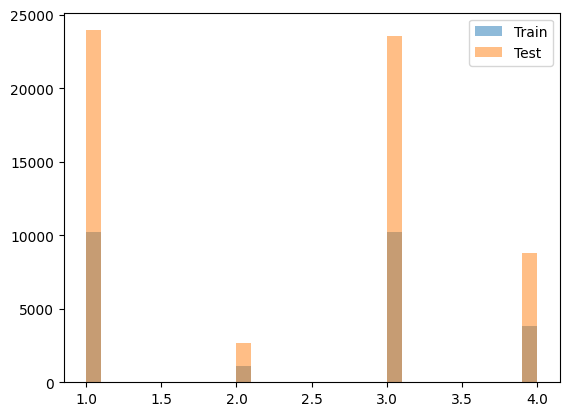

In [98]:
import matplotlib.pyplot as plt

# Comparar distribuciones de una característica específica
plt.hist(xtrain2004['estado'], bins=30, alpha=0.5, label='Train')
plt.hist(xtest2004['estado'], bins=30, alpha=0.5, label='Test')
plt.legend(loc='upper right')
plt.show()
